In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import norm
import warnings
warnings.filterwarnings('ignore')

In [2]:
df1 = pd.read_csv('Taiwain_integrated_da.csv')

In [3]:
df2 = pd.read_csv('USA_integrated_data.csv')

In [4]:
df2.shape

(92845, 15)

In [5]:
df1.shape

(6819, 13)

In [6]:
df1

,Tobin's Q,EPS,Liquidity,Profitability,Productivity,Leverage Ratio,Asset Turnover,Operational Margin,Return on Equity,Market Book Ratio,Assets Growth,Sales Growth,BK
0,0.880352,0.228813,0.002259,0.505180,0.848195,0.026984,0.086957,0.999016,0.840402,0.112310,4.980000e+09,0.022102,1.0
1,0.922287,0.208944,0.006016,0.464291,0.848088,0.026984,0.064468,0.999018,0.839969,0.174045,6.110000e+09,0.022080,1.0
2,1.037018,0.225628,0.011543,0.503822,0.848094,0.026984,0.014993,0.999026,0.841218,0.025855,7.280000e+09,0.022138,1.0
3,0.877219,0.224323,0.004194,0.505566,0.848005,0.026697,0.089955,0.999004,0.840402,1.774027,4.880000e+09,0.022046,1.0
4,0.858332,0.212537,0.006022,0.465022,0.848037,0.026984,0.175412,0.999016,0.839973,2.028921,5.510000e+09,0.022096,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0.942388,0.216602,0.010451,0.493687,0.848030,0.027064,0.103448,0.998992,0.840359,-0.075697,7.070000e+09,0.022138,0.0
6815,0.892640,0.216697,0.009259,0.475162,0.848037,0.027009,0.103448,0.998992,0.840306,-0.300213,5.220000e+09,0.022159,0.0
6816,0.904986,0.210929,0.025836,0.472725,0.847978,0.026791,0.106447,0.998984,0.840138,1.774027,5.990000e+09,0.022068,0.0
6817,0.919319,0.228326,0.012782,0.506264,0.847980,0.026822,0.109445,0.999018,0.841084,0.126140,7.250000e+09,0.022138,0.0


#### Integration

In [7]:
df1.shape

(6819, 13)

In [8]:
df1.columns

Index(['Tobin's Q', 'EPS', 'Liquidity', 'Profitability', 'Productivity',
       'Leverage Ratio', 'Asset Turnover', 'Operational Margin',
       'Return on Equity', 'Market Book Ratio', 'Assets Growth',
       'Sales Growth', 'BK'],
      dtype='object')

In [9]:
df2.shape

(92845, 15)

In [10]:
df2.columns

Index(['Data Year - Fiscal', 'Tobin's Q', 'EPS', 'Liquidity', 'Profitability',
       'Productivity', 'Leverage Ratio', 'Asset Turnover',
       'Operational Margin', 'Return on Equity', 'Market Book Ratio',
       'Assets Growth', 'Sales Growth', 'Employee Growth', 'BK'],
      dtype='object')

In [11]:
df2.drop(['Data Year - Fiscal','Employee Growth'],axis=1,inplace=True)

In [12]:
df2.columns


Index(['Tobin's Q', 'EPS', 'Liquidity', 'Profitability', 'Productivity',
       'Leverage Ratio', 'Asset Turnover', 'Operational Margin',
       'Return on Equity', 'Market Book Ratio', 'Assets Growth',
       'Sales Growth', 'BK'],
      dtype='object')

In [13]:
df = pd.concat([df1,df2],axis=0)

In [14]:
df

,Tobin's Q,EPS,Liquidity,Profitability,Productivity,Leverage Ratio,Asset Turnover,Operational Margin,Return on Equity,Market Book Ratio,Assets Growth,Sales Growth,BK
0,0.880352,0.228813,0.002259,0.505180,0.848195,0.026984,0.086957,0.999016,0.840402,0.112310,4.980000e+09,0.022102,1.0
1,0.922287,0.208944,0.006016,0.464291,0.848088,0.026984,0.064468,0.999018,0.839969,0.174045,6.110000e+09,0.022080,1.0
2,1.037018,0.225628,0.011543,0.503822,0.848094,0.026984,0.014993,0.999026,0.841218,0.025855,7.280000e+09,0.022138,1.0
3,0.877219,0.224323,0.004194,0.505566,0.848005,0.026697,0.089955,0.999004,0.840402,1.774027,4.880000e+09,0.022046,1.0
4,0.858332,0.212537,0.006022,0.465022,0.848037,0.026984,0.175412,0.999016,0.839973,2.028921,5.510000e+09,0.022096,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
92840,1.520923,-1.488171,-0.015494,-0.758859,-0.056905,1.345005,0.174115,-0.326823,-0.283168,-1.846719,-7.328654e-02,0.327312,0.0
92841,1.988495,-1.807630,0.093838,-1.204734,-0.121122,1.345005,0.215844,-0.270563,-0.283168,-2.474549,-2.018347e-01,-0.010544,0.0
92842,0.923868,-0.015660,0.039260,0.000000,-0.082429,0.744907,0.254186,-0.324286,-0.283168,347.810044,-1.680005e-01,-0.020206,0.0
92843,0.787787,-0.133054,0.053678,-0.029471,0.000998,0.574570,0.195683,0.005101,-0.085842,36.474842,7.693645e-02,-0.170928,0.0


In [15]:
df.shape

(99664, 13)

In [16]:
df['BK'].value_counts()

0.0    98886
1.0      778
Name: BK, dtype: int64

<AxesSubplot:xlabel='BK', ylabel='count'>

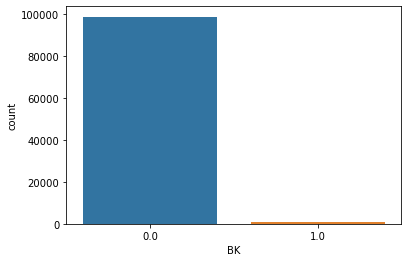

In [16]:
sns.countplot(x='BK', data=df)

In [17]:
#SMOTE

In [17]:
X=df.drop(labels=['BK'], axis=1)
y=df['BK']


In [19]:
oversample = SMOTE()
X,y=oversample.fit_resample(X,y)

<AxesSubplot:xlabel='BK', ylabel='count'>

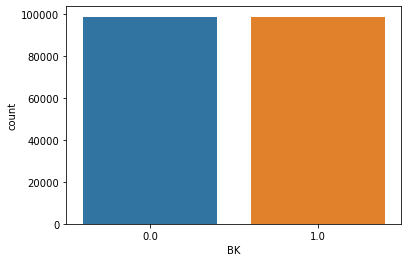

In [20]:
sns.countplot(x=y)

In [21]:
X.shape

(197772, 12)

In [21]:
X

,Tobin's Q,EPS,Liquidity,Profitability,Productivity,Leverage Ratio,Asset Turnover,Operational Margin,Return on Equity,Market Book Ratio,Assets Growth,Sales Growth
0,0.880352,0.228813,0.002259,0.505180,0.848195,0.026984,0.086957,0.999016,0.840402,0.112310,4.980000e+09,0.022102
1,0.922287,0.208944,0.006016,0.464291,0.848088,0.026984,0.064468,0.999018,0.839969,0.174045,6.110000e+09,0.022080
2,1.037018,0.225628,0.011543,0.503822,0.848094,0.026984,0.014993,0.999026,0.841218,0.025855,7.280000e+09,0.022138
3,0.877219,0.224323,0.004194,0.505566,0.848005,0.026697,0.089955,0.999004,0.840402,1.774027,4.880000e+09,0.022046
4,0.858332,0.212537,0.006022,0.465022,0.848037,0.026984,0.175412,0.999016,0.839973,2.028921,5.510000e+09,0.022096
...,...,...,...,...,...,...,...,...,...,...,...,...
197767,1.125611,-1.707911,0.163510,-0.347203,-0.077882,1.460773,1.119727,-0.056699,-0.283168,90.895408,-1.348847e-01,-0.211375
197768,0.989991,0.228813,0.002025,0.505381,0.847996,0.026737,0.110172,0.999004,0.840402,0.553142,4.139191e+09,0.022138
197769,1.651359,-0.772872,0.094530,-0.800261,-0.093517,1.345005,1.478751,-0.043842,-0.283168,-0.062458,-3.235388e-01,-0.125707
197770,1.575243,-1.157139,-0.231610,-0.776868,-0.195257,0.749517,0.565038,-0.289634,-0.283168,6.597018,-3.818698e-01,0.291355


In [23]:
##NOrmalization

In [22]:
from sklearn.preprocessing import MinMaxScaler
normal_scaling = MinMaxScaler()
normalized_data = normal_scaling.fit_transform(X)
normalized_data

array([[2.29391041e-01, 4.85706488e-01, 3.39896297e-01, ...,
        3.62765076e-01, 4.98498499e-01, 4.34629568e-01],
       [2.40434581e-01, 4.82208439e-01, 3.42658975e-01, ...,
        3.62832507e-01, 6.11611612e-01, 4.34606246e-01],
       [2.70648217e-01, 4.85145790e-01, 3.46722466e-01, ...,
        3.62670644e-01, 7.28728729e-01, 4.34667263e-01],
       ...,
       [4.32431755e-01, 3.09353527e-01, 4.07742489e-01, ...,
        3.62574183e-01, 8.70554812e-12, 2.78711499e-01],
       [4.12387018e-01, 2.41700827e-01, 1.67933482e-01, ...,
        3.69848085e-01, 2.86660756e-12, 7.18654540e-01],
       [2.34255359e-01, 4.84880232e-01, 3.44578236e-01, ...,
        3.62705591e-01, 5.81297210e-01, 4.34658811e-01]])

In [23]:
normalized_data_df = pd.DataFrame(normalized_data,columns = df.columns[0:12])

<Figure size 3200x2240 with 0 Axes>

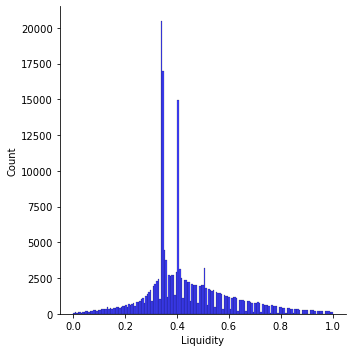

In [24]:
plt.figure(figsize=(40,28),dpi=80)
sns.displot(normalized_data_df["Liquidity"], color = 'blue', label = "Tobin's Q",kde = False)

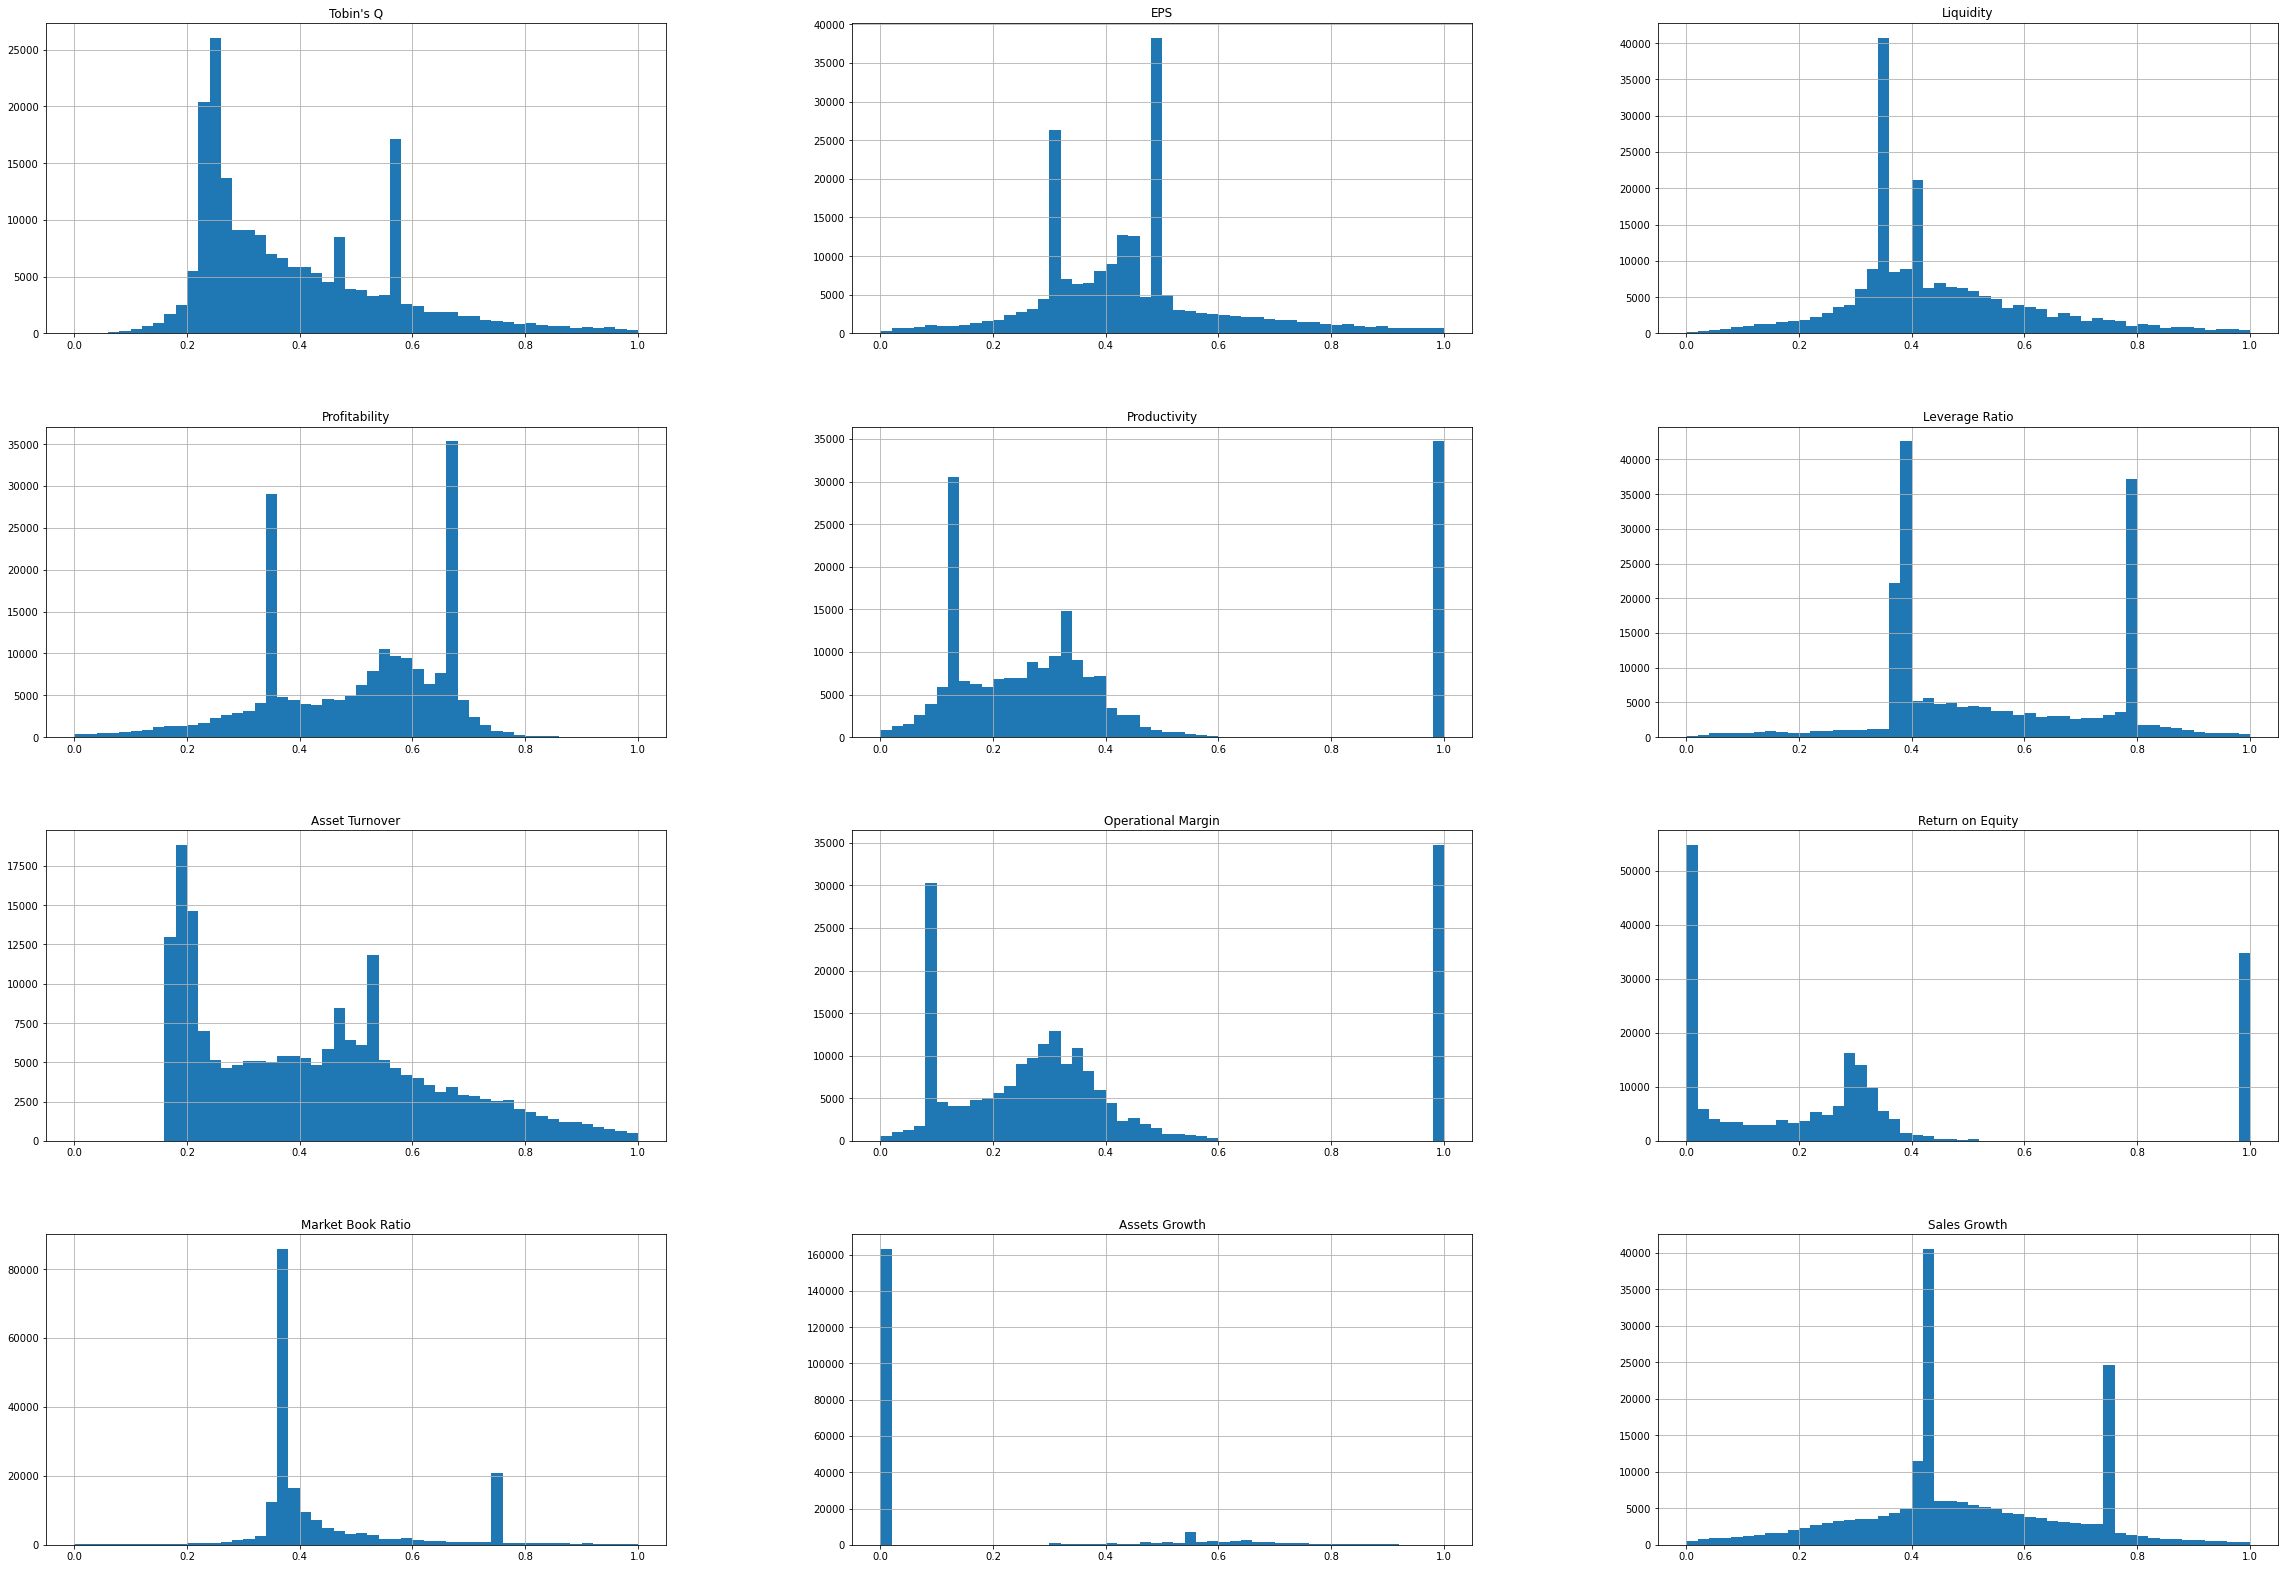

In [25]:
normalized_data_df.hist(figsize = (40,28), bins = 50)
plt.show()

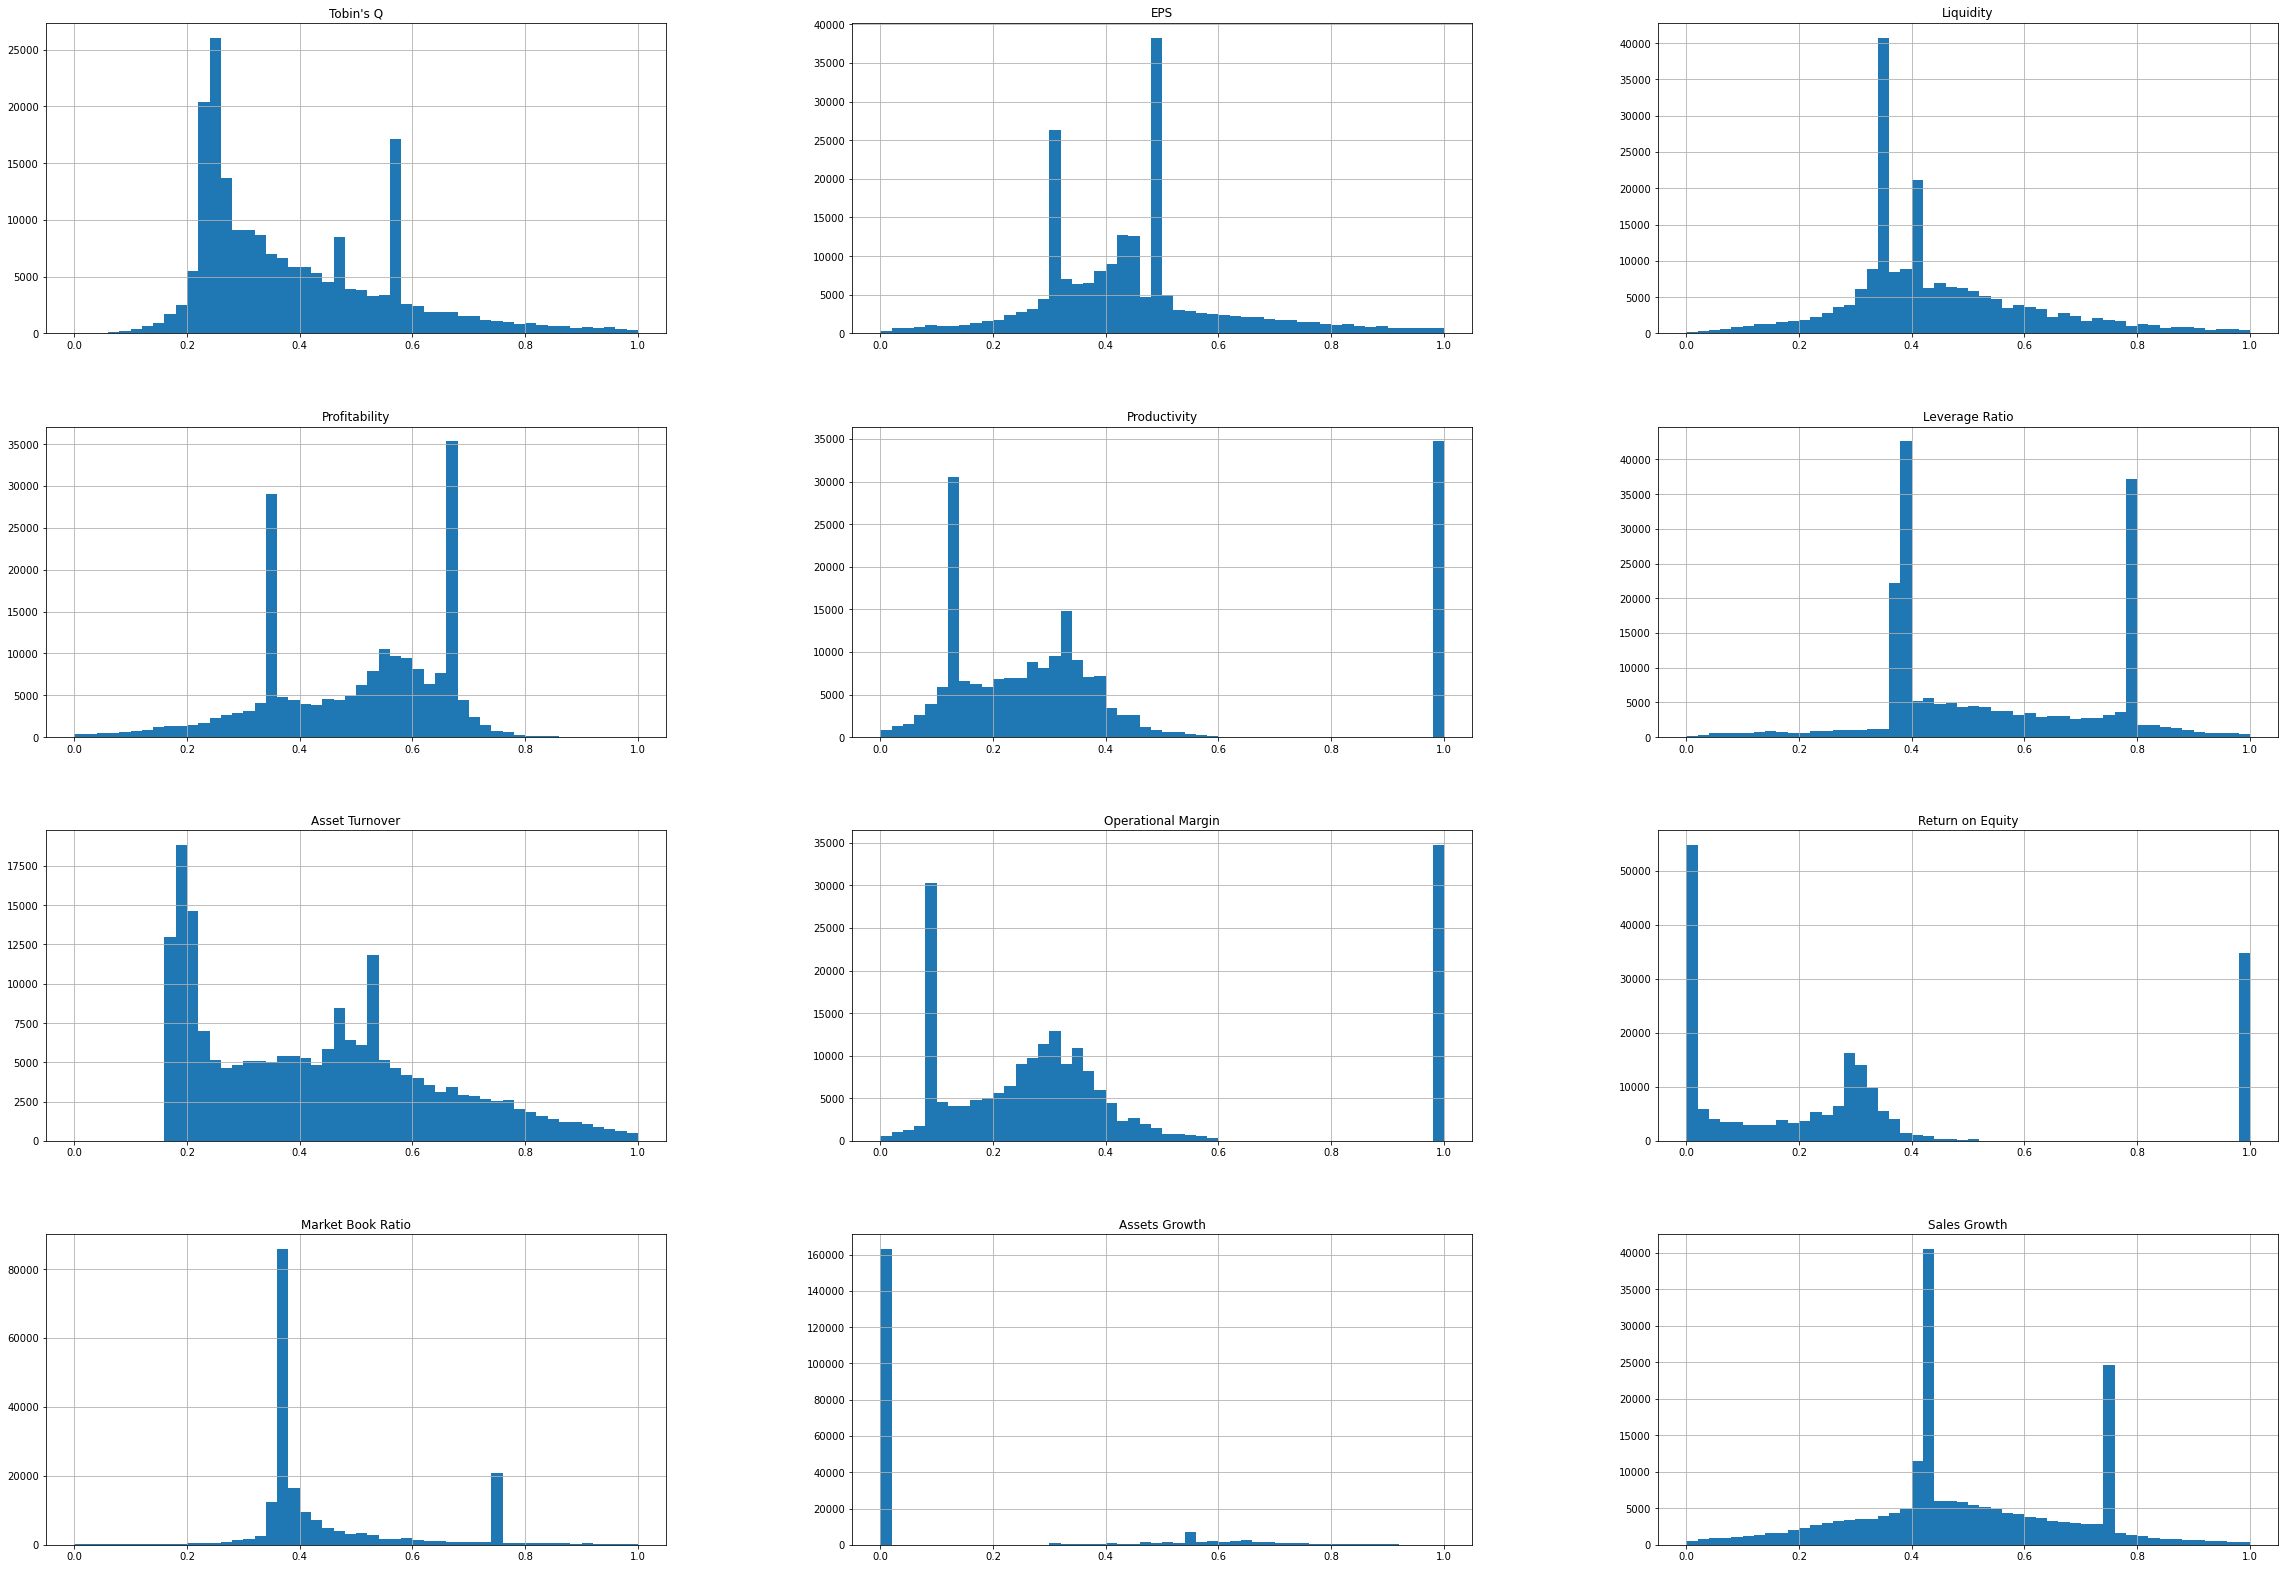

In [26]:
normalized_data_df.hist(figsize = (40,28), bins = 50)
plt.show()

In [27]:
##Standardization

In [28]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-0.95656961,  0.2685262 , -0.58023171, ..., -0.5537625 ,
         1.71014881, -0.32179815],
       [-0.89160308,  0.24712797, -0.5633983 , ..., -0.55331024,
         2.20019774, -0.32192185],
       [-0.7138634 ,  0.2650963 , -0.53863885, ..., -0.55439588,
         2.70759354, -0.32159821],
       ...,
       [ 0.23787092, -0.8102582 , -0.16683484, ..., -0.55504286,
        -0.44953586, -1.14879264],
       [ 0.11995247, -1.22410255, -1.62802652, ..., -0.50625536,
        -0.44953586,  1.18467951],
       [-0.92795398,  0.26347184, -0.55170396, ..., -0.55416148,
         2.06886425, -0.32164304]])

In [29]:
X_scaled.std()

1.0

In [30]:
Standard_data_df = pd.DataFrame(X_scaled,columns = df.columns[0:12])

In [31]:
Standard_data_df.shape

(197772, 12)

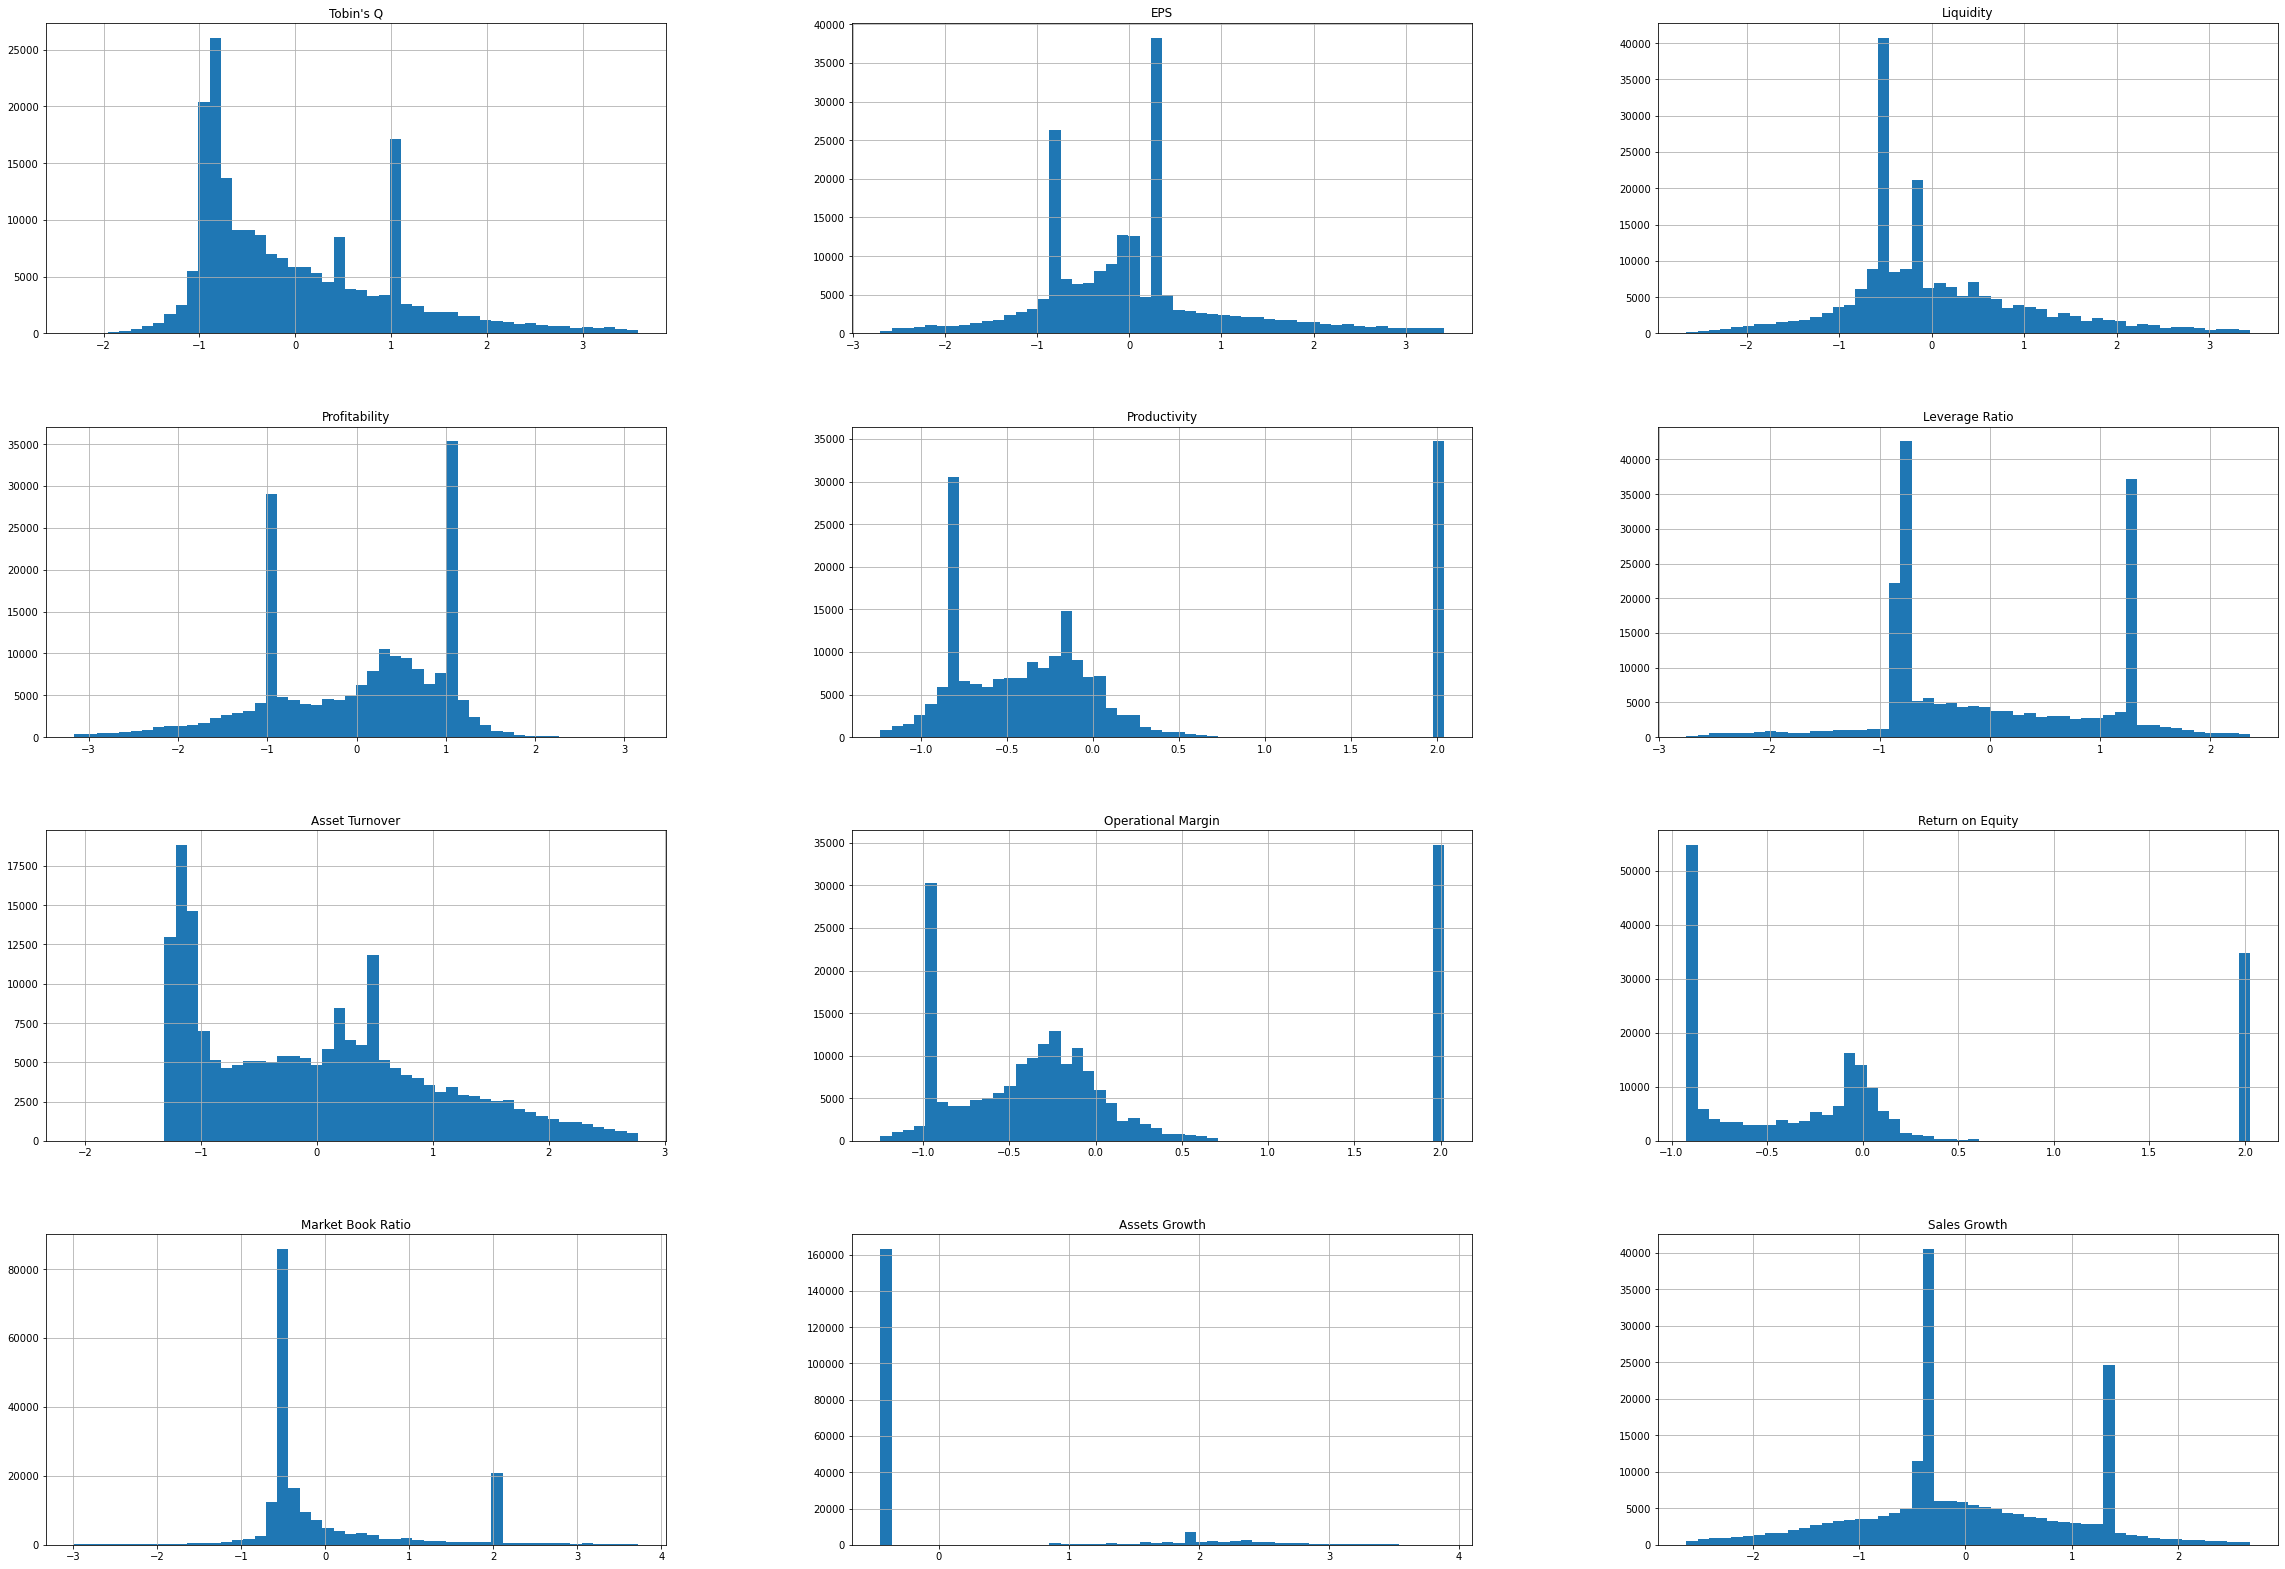

In [32]:
Standard_data_df.hist(figsize = (40,28), bins = 50)
plt.show()

PAir plot

In [33]:
ppp = pd.concat([Standard_data_df,y],axis=1)

In [34]:
ppp

,Tobin's Q,EPS,Liquidity,Profitability,Productivity,Leverage Ratio,Asset Turnover,Operational Margin,Return on Equity,Market Book Ratio,Assets Growth,Sales Growth,BK
0,-0.956570,0.268526,-0.580232,1.103722,2.039756,-0.795805,-1.143342,2.018375,2.015359,-0.553763,1.710149,-0.321798,1.0
1,-0.891603,0.247128,-0.563398,1.036506,2.039454,-0.795805,-1.180356,2.018379,2.014248,-0.553310,2.200198,-0.321922,1.0
2,-0.713863,0.265096,-0.538639,1.101490,2.039472,-0.795805,-1.261786,2.018399,2.017453,-0.554396,2.707594,-0.321598,1.0
3,-0.961423,0.263691,-0.571562,1.104356,2.039222,-0.796254,-1.138407,2.018347,2.015359,-0.541589,1.666782,-0.322113,1.0
4,-0.990683,0.250997,-0.563370,1.037708,2.039311,-0.795805,-0.997755,2.018375,2.014257,-0.539721,1.939995,-0.321834,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
197767,-0.576616,-1.817267,0.142215,-0.297486,-0.567329,1.439875,0.556469,-0.455839,-0.867194,0.111317,-0.449536,-1.628111,1.0
197768,-0.786716,0.268526,-0.581278,1.104053,2.039195,-0.796191,-1.105133,2.018347,2.015359,-0.550533,1.345514,-0.321598,1.0
197769,0.237871,-0.810258,-0.166835,-1.042257,-0.611345,1.259360,1.147377,-0.425707,-0.867194,-0.555043,-0.449536,-1.148793,1.0
197770,0.119952,-1.224103,-1.628027,-1.003801,-0.897763,0.330826,-0.356479,-1.001752,-0.867194,-0.506255,-0.449536,1.184680,1.0


In [38]:
# sns.pairplot(ppp[5:-1],hue='BK')

In [39]:
# X = df.drop(['BK'],axis=1)

In [40]:
# y = df['BK']

In [35]:
X.shape

(197772, 12)

In [36]:
y.shape

(197772,)

In [37]:
pca = PCA(n_components=12)
X_pca = pca.fit_transform(X_scaled)

In [38]:
print("Shape after PCA",X_pca.shape)

Shape after PCA (197772, 12)


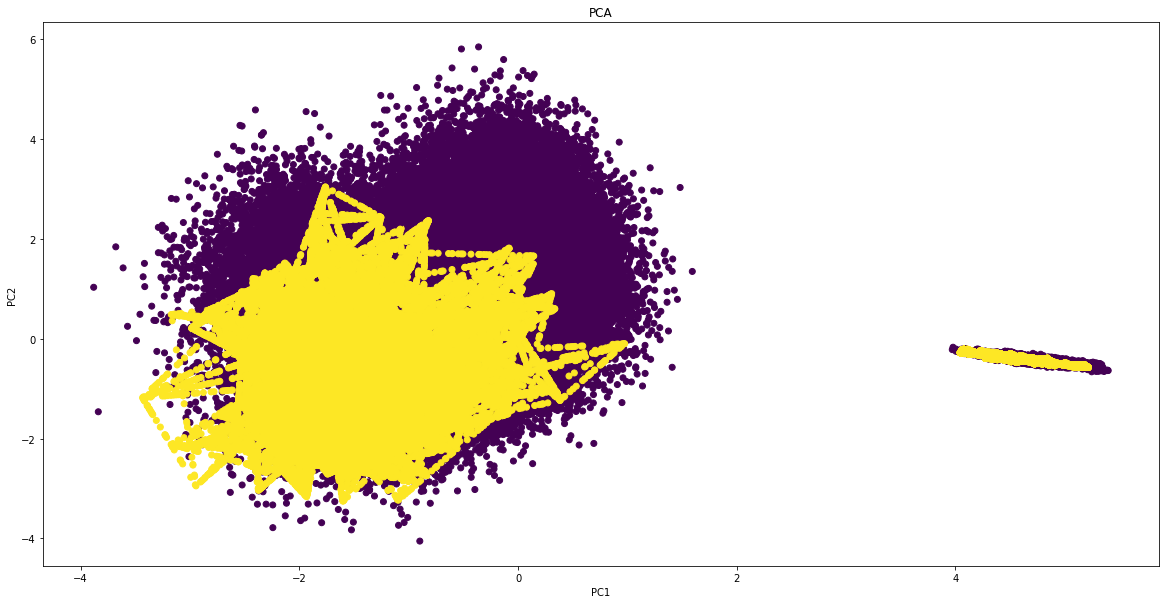

In [41]:
plt.figure(figsize=(20,10))
plt.scatter(X_pca[:,0],X_pca[:,1],c=y)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA')
plt.show()

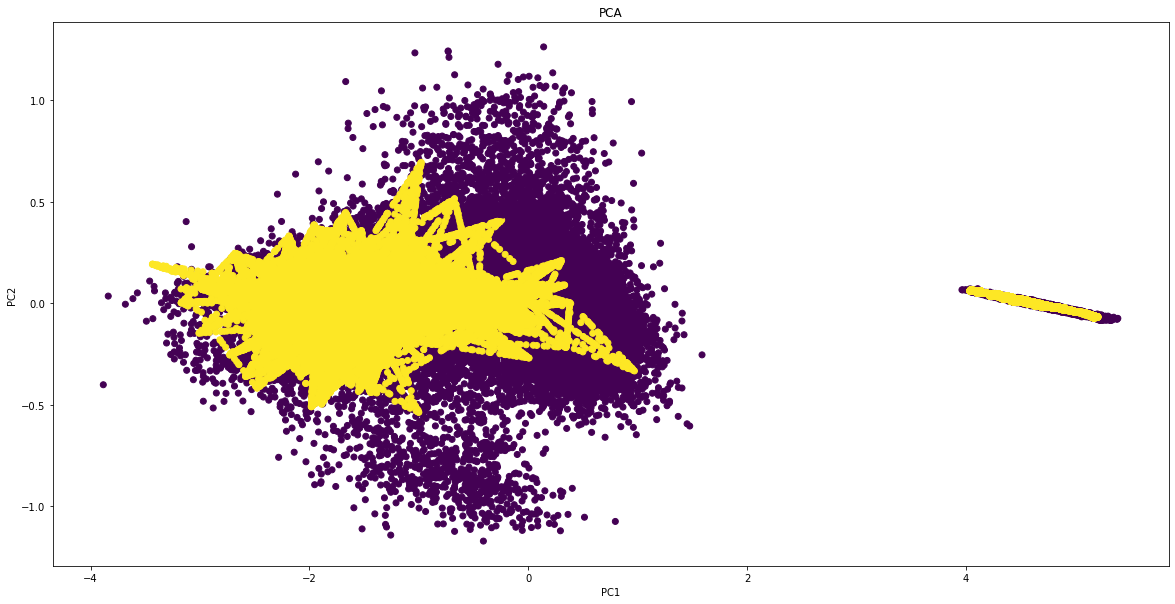

In [46]:
plt.figure(figsize=(20,10))
plt.scatter(X_pca[:,0],X_pca[:,-1],c=y)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA')
plt.show()

In [45]:
X_pca.shape

(197772, 12)

In [39]:
df_pca = pd.DataFrame(X_pca, columns = ['Column_A','Column_B','Column_C','Column_D','Column_E','Column_F','Column_G','Column_H','Column_I','Column_J','Column_K','Column_L'])

In [40]:
df_pca

,Column_A,Column_B,Column_C,Column_D,Column_E,Column_F,Column_G,Column_H,Column_I,Column_J,Column_K,Column_L
0,4.445128,-0.388763,0.319536,0.044945,-0.001390,0.012960,-0.083567,-0.004636,0.038072,-0.290221,0.075179,0.023271
1,4.616202,-0.433997,0.481280,0.058783,0.017971,0.036908,-0.189779,0.093849,0.165239,0.093152,-0.012973,0.001171
2,4.829552,-0.386472,0.636852,0.082736,0.057947,0.086961,-0.307397,0.244769,0.158084,0.515237,-0.106080,-0.025283
3,4.424563,-0.379183,0.309162,0.042115,0.001556,0.001115,-0.083203,-0.015525,0.033761,-0.324852,0.082758,0.025011
4,4.487226,-0.438586,0.306866,0.000038,-0.006364,0.063316,-0.194807,-0.026571,0.194225,-0.109395,0.039332,0.012229
...,...,...,...,...,...,...,...,...,...,...,...,...
197767,-1.541980,-1.996070,-0.675091,-0.317720,1.147749,-1.115621,-0.848369,0.135391,-0.198728,-0.032367,-0.118474,0.014083
197768,4.249636,-0.281885,0.298689,0.036413,0.031818,0.092570,-0.085430,0.029325,-0.085278,-0.581592,0.140238,0.037097
197769,-1.850945,-1.575814,-0.575550,-0.380391,0.681675,0.344545,-0.498532,0.705097,0.345637,-0.055757,-0.162955,-0.056647
197770,-1.763860,-1.401682,1.116431,1.328266,-0.972638,0.527417,0.230287,-0.518064,-0.407115,0.134609,0.114032,0.040928


In [41]:
final = pd.concat([df_pca,y],axis=1)

In [42]:
final

,Column_A,Column_B,Column_C,Column_D,Column_E,Column_F,Column_G,Column_H,Column_I,Column_J,Column_K,Column_L,BK
0,4.445128,-0.388763,0.319536,0.044945,-0.001390,0.012960,-0.083567,-0.004636,0.038072,-0.290221,0.075179,0.023271,1.0
1,4.616202,-0.433997,0.481280,0.058783,0.017971,0.036908,-0.189779,0.093849,0.165239,0.093152,-0.012973,0.001171,1.0
2,4.829552,-0.386472,0.636852,0.082736,0.057947,0.086961,-0.307397,0.244769,0.158084,0.515237,-0.106080,-0.025283,1.0
3,4.424563,-0.379183,0.309162,0.042115,0.001556,0.001115,-0.083203,-0.015525,0.033761,-0.324852,0.082758,0.025011,1.0
4,4.487226,-0.438586,0.306866,0.000038,-0.006364,0.063316,-0.194807,-0.026571,0.194225,-0.109395,0.039332,0.012229,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
197767,-1.541980,-1.996070,-0.675091,-0.317720,1.147749,-1.115621,-0.848369,0.135391,-0.198728,-0.032367,-0.118474,0.014083,1.0
197768,4.249636,-0.281885,0.298689,0.036413,0.031818,0.092570,-0.085430,0.029325,-0.085278,-0.581592,0.140238,0.037097,1.0
197769,-1.850945,-1.575814,-0.575550,-0.380391,0.681675,0.344545,-0.498532,0.705097,0.345637,-0.055757,-0.162955,-0.056647,1.0
197770,-1.763860,-1.401682,1.116431,1.328266,-0.972638,0.527417,0.230287,-0.518064,-0.407115,0.134609,0.114032,0.040928,1.0


In [43]:
from sklearn.model_selection import train_test_split
X_trai, X_test, y_trai,y_test = train_test_split(df_pca,y,test_size=0.2,random_state = 42)

In [44]:
X_train, X_val, y_train,y_val = train_test_split(X_trai,y_trai,test_size=0.2,random_state = 42)

In [45]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(126573, 12)
(31644, 12)
(39555, 12)


In [49]:
#### SVM
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [56]:
#SVM
# svm = SVC()
# svm.fit(X_train,y_train)
# y_pred = svm.predict(X_test)


In [57]:
# #Accuracy
# print(confusion_matrix(y_test,y_pred))
# print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
# print("Classification report: {}".format(classification_report(y_test,y_pred)))

#### Light GBM

In [58]:
!pip install lightgbm

In [46]:
import lightgbm as lgb

In [47]:

clf = lgb.LGBMClassifier()
clf.fit(X_train, y_train)

LGBMClassifier()

In [48]:
y_pred=clf.predict(X_test)

In [49]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred, y_test)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

LightGBM Model accuracy score: 0.9247


In [50]:
print('Training set score: {:.4f}'.format(clf.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf.score(X_test, y_test)))

Training set score: 0.9312
Test set score: 0.9247


In [51]:
from sklearn.metrics import classification_report
print("Classification report for LightGBM")
print(classification_report(y_test, y_pred))

Classification report for LightGBM
              precision    recall  f1-score   support

         0.0       0.95      0.89      0.92     19728
         1.0       0.90      0.96      0.93     19827

    accuracy                           0.92     39555
   macro avg       0.93      0.92      0.92     39555
weighted avg       0.93      0.92      0.92     39555



In [52]:
### Roc curve
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [72]:
### ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc_score = auc(fpr, tpr)
print('AUC: {}'.format(auc_score))

AUC: 0.924655040737415


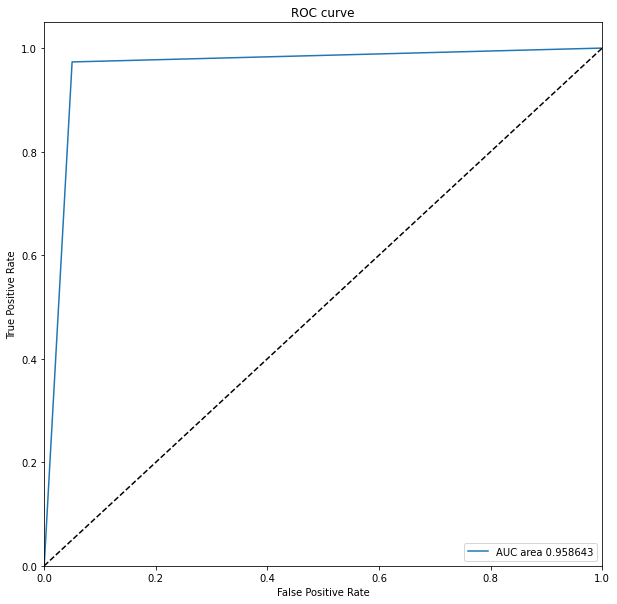

In [81]:
### Plot ROC curve


plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, label='AUC area = %0.2f' % auc_score)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

In [98]:
#### Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)


[[17551  2177]
 [  775 19052]]


## Randomized Search CV

In [111]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt', 'log2']
max_depth = [int(x) for x in np.linspace(10,1000,10)]
min_samples_split = [1,3,4,5,7,8,9]
min_samples_leaf = [1,2,4,6,8]
random_grid = {'n_estimators':n_estimators,
               'max_features':max_features,
               'max_depth': max_depth,
               'min_samples_split':min_samples_split,
               'min_samples_leaf':min_samples_leaf,
               'criterion':['entropy','gini']}
print(random_grid)

{'n_estimators': [100, 311, 522, 733, 944, 1155, 1366, 1577, 1788, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [1, 3, 4, 5, 7, 8, 9], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


## Random Forest

In [112]:
from sklearn.ensemble import RandomForestClassifier
random_classifier = lgb.LGBMClassifier()
rf_randomized = RandomizedSearchCV(estimator=random_classifier,param_distributions=random_grid,n_iter=10,cv=3,verbose=2,random_state=100,n_jobs=-1)
rf_randomized.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[LightGBM] [Warning] Unknown parameter: min_samples_leaf
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Unknown parameter: criterion
[LightGBM] [Warning] Unknown parameter: max_features


RandomizedSearchCV(cv=3, estimator=LGBMClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [1, 3, 4, 5, 7, 8,
                                                              9],
                                        'n_estimators': [100, 311, 522, 733,
                                                         944, 1155, 1366, 1577,
                                                         1788, 2000]},
                   random_state=100, verbose=2)

In [113]:
# random_classifier.fit(X_train,y_train)
rf_randomized.best_params_

{'n_estimators': 2000,
 'min_samples_split': 1,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 10,
 'criterion': 'entropy'}

In [114]:
rf_randomized.best_estimator_

LGBMClassifier(criterion='entropy', max_depth=10, max_features='auto',
               min_samples_leaf=2, min_samples_split=1, n_estimators=2000)

In [115]:
best_random_grid = rf_randomized.best_estimator_

In [116]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
y_pred = best_random_grid.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

[[18984   744]
 [   28 19799]]
Accuracy Score 0.9804828719504487
Classification report:               precision    recall  f1-score   support

         0.0       1.00      0.96      0.98     19728
         1.0       0.96      1.00      0.98     19827

    accuracy                           0.98     39555
   macro avg       0.98      0.98      0.98     39555
weighted avg       0.98      0.98      0.98     39555



In [125]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'criterion':[rf_randomized.best_params_['criterion']],
    'max_depth' :[rf_randomized.best_params_['max_depth']],
    'max_features':[rf_randomized.best_params_['max_features']],
    'min_samples_leaf':[rf_randomized.best_params_['min_samples_leaf'],
                       rf_randomized.best_params_['min_samples_leaf']+2,
                       rf_randomized.best_params_['min_samples_leaf']+4],
    'min_samples_split':[rf_randomized.best_params_['min_samples_split']-2,
                         rf_randomized.best_params_['min_samples_split']-1,
                         rf_randomized.best_params_['min_samples_split'],
                         rf_randomized.best_params_['min_samples_split']+2,
                         rf_randomized.best_params_['min_samples_split']+1],
    'n_estimators':[rf_randomized.best_params_['n_estimators']-200,rf_randomized.best_params_['n_estimators']-100,
                  rf_randomized.best_params_['n_estimators'],rf_randomized.best_params_['n_estimators']+200
                  ,rf_randomized.best_params_['n_estimators']+100]
}
print(param_grid)

{'criterion': ['entropy'], 'max_depth': [10], 'max_features': ['auto'], 'min_samples_leaf': [2, 4, 6], 'min_samples_split': [-1, 0, 1, 3, 2], 'n_estimators': [1800, 1900, 2000, 2200, 2100]}


In [68]:
# #Grid Search
# rf = RandomForestClassifier()
# grid_search=GridSearchCV(estimator = rf,param_grid=param_grid,cv=2,n_jobs=-1,verbose=2)
# grid_search.fit(X_train,y_train)

In [69]:
# grid_search.best_estimator_

In [70]:
# best_grid = grid_search.best_estimator_

In [71]:
# best_grid

In [72]:
# #optional
# from sklearn.ensemble import RandomForestClassifier
# xx = RandomForestClassifier(criterion='entropy', max_depth=10, max_features='sqrt',
#                        min_samples_split=5, n_estimators=300)

In [73]:
# xx.fit(X_train,y_train)

In [74]:
# y_pred = xx.predict(X_test)
# # RandomForestClassifier(criterion='entropy', max_depth=560,10-92%, max_features='sqrt',
# #                        min_samples_split=5, n_estimators=300)

In [75]:
# from sklearn.metrics import accuracy_score, confusion_matrix
# print(confusion_matrix(y_test,y_pred))
# print('Accuracy Score {}'.format(accuracy_score(y_test,y_pred)))
# print('Classification reportL {}'.format(classification_report(y_test,y_pred)))

In [76]:
# accuracy_score(xx.predict(X_train),y_train)
# #accuracy_score(Y_trainn, xgb.predict(X_trainn))

In [77]:
#optional ends

In [78]:
#Accuracy score, Classification report

In [79]:
# y_pred = best_grid.predict(X_test)
# print(confusion_matrix(y_test,y_pred))
# print('Accuracy Score {}'.format(accuracy_score(y_test,y_pred)))
# print('Classification reportL {}'.format(classification_report(y_test,y_pred)))

In [80]:
# accuracy_score(y_train,best_grid.predict(x_train))

In [81]:
#over

In [82]:
# y_pred = random_classifier.predict(X_test)

In [83]:
# from sklearn.metrics import confusion_matrix,accuracy_score
# cm = confusion_matrix(y_test,y_pred)
# print(cm)
# accuracy_score(y_test,y_pred)

In [84]:
# random_classifier.score(X_test,y_test)

## KNN

In [85]:
# from sklearn import metrics
# from sklearn.neighbors import KNeighborsClassifier
# kk = KNeighborsClassifier(n_neighbors=5, p=2, metric="minkowski")
# kk.fit(X_train,y_train)

In [86]:
# y_pred = kk.predict(X_test)
# # kk.score(X_test,y_test)
# cm = confusion_matrix(y_pred, y_test)
# print(cm)
# accuracy_score(y_pred,y_test)

##Logistic Regressor

In [87]:
# from sklearn.linear_model import LogisticRegression
# LR = LogisticRegression(random_state=0)


In [88]:
# LR.fit(X_train,y_train)

In [89]:
# y_pred = LR.predict(X_test)
# #print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

In [90]:
# from sklearn.metrics import confusion_matrix, accuracy_score
# cm = confusion_matrix(y_pred, y_test)
# print(cm)
# accuracy_score(y_pred,y_test)

### Ensemble  models

In [50]:
### stacking
# Remove low variance features
from sklearn.feature_selection import VarianceThreshold

selection = VarianceThreshold(threshold=(0.1))    
X = selection.fit_transform(X)
X.shape

(197772, 10)

In [51]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import f1_score

In [52]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(3) # Define classifier
knn.fit(X_train, y_train) # Train model

# Make predictions
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

# Training set performance
knn_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
knn_train_mcc = matthews_corrcoef(y_train, y_train_pred) # Calculate MCC
knn_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score

# Test set performance
knn_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
knn_test_mcc = matthews_corrcoef(y_test, y_test_pred) # Calculate MCC
knn_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score

print('Model performance for Training set')
print('- Accuracy: %s' % knn_train_accuracy)
print('- MCC: %s' % knn_train_mcc)
print('- F1 score: %s' % knn_train_f1)
print('----------------------------------')
print('Model performance for Test set')
print('- Accuracy: %s' % knn_test_accuracy)
print('- MCC: %s' % knn_test_mcc)
print('- F1 score: %s' % knn_test_f1)

Model performance for Training set
- Accuracy: 0.9772700338934844
- MCC: 0.9555216852842703
- F1 score: 0.9772589154894401
----------------------------------
Model performance for Test set
- Accuracy: 0.9630640879787637
- MCC: 0.92861075113192
- F1 score: 0.9630110543850753


In [53]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=5) # Define classifier
dt.fit(X_train, y_train) # Train model

# Make predictions
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

# Training set performance
dt_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
dt_train_mcc = matthews_corrcoef(y_train, y_train_pred) # Calculate MCC
dt_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score

# Test set performance
dt_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
dt_test_mcc = matthews_corrcoef(y_test, y_test_pred) # Calculate MCC
dt_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score

print('Model performance for Training set')
print('- Accuracy: %s' % dt_train_accuracy)
print('- MCC: %s' % dt_train_mcc)
print('- F1 score: %s' % dt_train_f1)
print('----------------------------------')
print('Model performance for Test set')
print('- Accuracy: %s' % dt_test_accuracy)
print('- MCC: %s' % dt_test_mcc)
print('- F1 score: %s' % dt_test_f1)

Model performance for Training set
- Accuracy: 0.8242042141688986
- MCC: 0.6525476134418163
- F1 score: 0.8236622563954245
----------------------------------
Model performance for Test set
- Accuracy: 0.8206042219694096
- MCC: 0.6447854805874718
- F1 score: 0.8200691200380349


In [54]:
# from sklearn.svm import SVC

# svm_rbf = SVC(gamma=2, C=1)
# svm_rbf.fit(X_train, y_train)

# # Make predictions
# y_train_pred = svm_rbf.predict(X_train)
# y_test_pred = svm_rbf.predict(X_test)

# # Training set performance
# svm_rbf_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
# svm_rbf_train_mcc = matthews_corrcoef(y_train, y_train_pred) # Calculate MCC
# svm_rbf_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score

# # Test set performance
# svm_rbf_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
# svm_rbf_test_mcc = matthews_corrcoef(y_test, y_test_pred) # Calculate MCC
# svm_rbf_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score

# print('Model performance for Training set')
# print('- Accuracy: %s' % svm_rbf_train_accuracy)
# print('- MCC: %s' % svm_rbf_train_mcc)
# print('- F1 score: %s' % svm_rbf_train_f1)
# print('----------------------------------')
# print('Model performance for Test set')
# print('- Accuracy: %s' % svm_rbf_test_accuracy)
# print('- MCC: %s' % svm_rbf_test_mcc)
# print('- F1 score: %s' % svm_rbf_test_f1)

#### Building a stacked model

In [56]:
# Define estimators
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score
estimator_list = [
    ('knn',knn),
    ('dt',dt),
     ]

# Build stack model
stack_model = StackingClassifier(
    estimators=estimator_list, final_estimator=LogisticRegression()
)

# Train stacked model
stack_model.fit(X_train, y_train)

# Make predictions
y_train_pred = stack_model.predict(X_train)
y_test_pred = stack_model.predict(X_test)

# Training set model performance
stack_model_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
stack_model_train_mcc = matthews_corrcoef(y_train, y_train_pred) # Calculate MCC
stack_model_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score
stack_model_train_precision = precision_score(y_train, y_train_pred, average='weighted') # Calculate Precision
stack_model_train_recall = recall_score(y_train, y_train_pred, average='weighted') # Calculate Recall

# Test set model performance
stack_model_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
stack_model_test_mcc = matthews_corrcoef(y_test, y_test_pred) # Calculate MCC
stack_model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score
stack_model_test_precision = precision_score(y_test, y_test_pred, average='weighted') # Calculate Precision
stack_model_test_recall = recall_score(y_test, y_test_pred, average='weighted') # Calculate Recall

print('Model performance for Training set')
print('- Accuracy: %s' % stack_model_train_accuracy)
print('- MCC: %s' % stack_model_train_mcc)
print('- F1 score: %s' % stack_model_train_f1)
print('- Precision: %s' % stack_model_train_precision)
print('- Recall: %s' % stack_model_train_recall)
print('----------------------------------')
print('Model performance for Test set')
print('- Accuracy: %s' % stack_model_test_accuracy)
print('- MCC: %s' % stack_model_test_mcc)
print('- F1 score: %s' % stack_model_test_f1)
print('- Precision: %s' % stack_model_test_precision)
print('- Recall: %s' % stack_model_test_recall)

Model performance for Training set
- Accuracy: 0.9992652461425422
- MCC: 0.99853156662312
- F1 score: 0.9992652451871273
- Precision: 0.9992663231716028
- Recall: 0.9992652461425422
----------------------------------
Model performance for Test set
- Accuracy: 0.9775755277461762
- MCC: 0.9557998507620946
- F1 score: 0.9775668280079157
- Precision: 0.9782268979154778
- Recall: 0.9775755277461762


In [59]:
acc_train_list = {'knn':knn_train_accuracy,
'dt': dt_train_accuracy,
'stack': stack_model_train_accuracy}

mcc_train_list = {'knn':knn_train_mcc,
'dt': dt_train_mcc,
'stack': stack_model_train_mcc}

f1_train_list = {'knn':knn_train_f1,

'dt': dt_train_f1,
'stack': stack_model_train_f1}

In [60]:
mcc_train_list


{'knn': 0.9555876962212048,
 'dt': 0.6652234084394205,
 'stack': 0.9982791494994253}

In [61]:
import pandas as pd

acc_df = pd.DataFrame.from_dict(acc_train_list, orient='index', columns=['Accuracy'])
mcc_df = pd.DataFrame.from_dict(mcc_train_list, orient='index', columns=['MCC'])
f1_df = pd.DataFrame.from_dict(f1_train_list, orient='index', columns=['F1'])
df = pd.concat([acc_df, mcc_df, f1_df], axis=1)
df

,Accuracy,MCC,F1
knn,0.977302,0.955588,0.977291
dt,0.831244,0.665223,0.830908
stack,0.999139,0.998279,0.999139
